# ML Take-Home Assignment: Predicting 1D Heat Equation Solutions

## Background
The 1D heat equation is one of the simplest partial differential equations (PDEs) in computational fluid dynamics. In this assignment, you'll build a neural network to predict the temperature distribution over time, given initial conditions.

## Task Overview
1. Understand the provided code for generating training data
2. Complete the neural network architecture
3. Train the model and evaluate its performance
4. Answer some reflection questions

**Time Limit:** 2 hours

## Getting Started
First, let's import the necessary libraries and generate our training data.

In [3]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

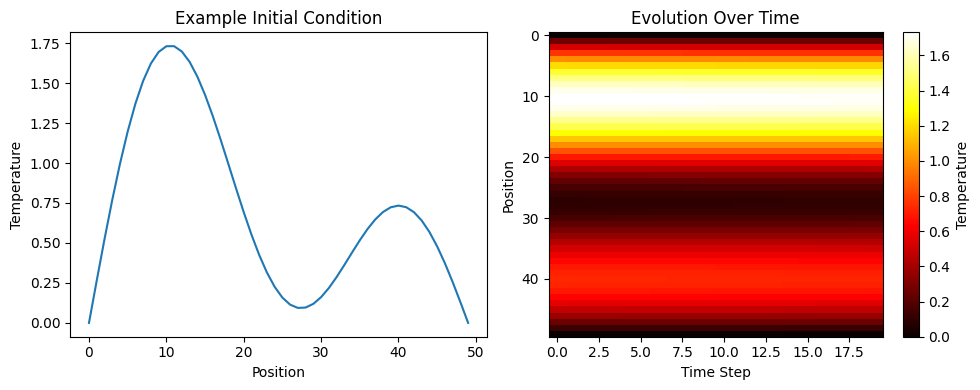

In [6]:
def generate_heat_equation_data(n_samples=1000, nx=50, nt=20, dx=0.02, dt=0.001):
    """Generate solutions for the 1D heat equation with random initial conditions."""
    # Thermal diffusivity
    alpha = 0.01
    
    # Initialize arrays
    x = np.linspace(0, 1, nx)
    solutions = np.zeros((n_samples, nt, nx))
    initial_conditions = np.zeros((n_samples, nx))
    
    for i in range(n_samples):
        # Generate random initial condition (sum of random sinusoids)
        u = np.zeros(nx)
        for k in range(1, 4):
            A = np.random.rand()
            u += A * np.sin(k * np.pi * x)
        
        initial_conditions[i] = u
        solutions[i, 0] = u
        
        # Solve heat equation using finite differences
        for t in range(1, nt):
            u[1:-1] = u[1:-1] + alpha * dt/dx**2 * (u[2:] - 2*u[1:-1] + u[:-2])
            u[0] = u[-1] = 0  # Boundary conditions
            solutions[i, t] = u
    
    return initial_conditions, solutions

# Generate data
initial_conditions, solutions = generate_heat_equation_data()

# Visualize an example
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(initial_conditions[0])
plt.title('Example Initial Condition')
plt.xlabel('Position')
plt.ylabel('Temperature')

plt.subplot(122)
plt.imshow(solutions[0].T, aspect='auto', cmap='hot')
plt.colorbar(label='Temperature')
plt.title('Evolution Over Time')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.tight_layout()
plt.show()

# Task 0: Split into Train and Test

In [ ]:
# Split into train and test sets
train_size = None # TODO: determine a reasonable train size. Remember you have 1000 samples
X_train = None # TODO: fill out
y_train = None # TODO: fill out
X_test = None # TODO: fill out
y_test = None # TODO: fill out

## Task 1: Complete the Neural Network Architecture

Complete the neural network architecture below. The network should:
1. Take the initial temperature distribution (size 50) as input
2. Predict the temperature distribution at all 20 time steps (output size 20×50)
3. Use at least one hidden layer

**Hint:** Consider how to structure the network to capture both spatial and temporal dependencies. You might want to think about:
- The dimensionality of your input and output
- How to preserve spatial relationships
- Whether to use conventional dense layers or more specialized layers

In [ ]:
class HeatPredictor(nn.Module):
    def __init__(self):
        super(HeatPredictor, self).__init__()
        # TODO: Define your neural network architecture here
        # Input size: 50 (initial condition)
        # Output size: 1000 (20 time steps × 50 spatial points)
        pass

    def forward(self, x):
        # TODO: Implement the forward pass
        pass

## Task 2: Training Loop

Complete the training loop below. Make sure to:
1. Define appropriate loss function and optimizer
2. Reshape the predictions and targets as needed
3. Track and plot the training loss

In [ ]:
def train_model(model, X_train, y_train, epochs=100):
    # TODO: Implement the training loop
    # 1. Define loss function and optimizer
    # 2. For each epoch:
    #    - Forward pass
    #    - Calculate loss
    #    - Backward pass
    #    - Update weights
    # 3. Track and return training losses
    pass

# Initialize and train your model
model = HeatPredictor()
losses = train_model(model, X_train, y_train)

# Plot training loss
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.grid(True)
plt.show()

## Task 3: Evaluation

Complete the following code to evaluate your model's performance:
1. Plot predicted vs. actual temperature distributions for a test case
2. Calculate and report the mean squared error on the test set

In [ ]:
def evaluate_model(model, X_test, y_test):
    # TODO: Implement model evaluation
    # 1. Make predictions on test data
    # 2. Calculate test set MSE
    # 3. Create visualization comparing predictions with ground truth
    pass

# Evaluate your model
evaluate_model(model, X_test, y_test)

## Reflection Questions

Please answer the following questions briefly (2-3 sentences each):

1. How did you choose your neural network architecture? What other architectures did you consider?

2. What are the limitations of your current approach? How might you improve it if you had more time?

3. How might this simplified 1D problem relate to more complex CFD simulations? What additional challenges would you expect when scaling to 2D or 3D?

Your answers:
1. [Your answer here]
2. [Your answer here]
3. [Your answer here]